In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Extração**

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


""
0
1
2
3
4
5


In [4]:
cust = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
inter = pd.json_normalize(df['internet'])
accon = pd.json_normalize(df['account'])
dff = pd.concat([df.drop(['customer','phone','internet','account'], axis=1),cust, phone, inter, accon], axis=1)
dff.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Tratamento de dados**

In [5]:
dff.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [6]:
colu = dff.columns.tolist()
dff.info()
for i in colu:
  print(dff[i].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
dff.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [25]:
dfft = dff.copy()
dele = dfft[dfft['tenure'] <=0].index
dfft.drop(dele, inplace = True)
dfft['Charges.Total'] = dfft['Charges.Total'].astype(np.float64)
dfft

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [27]:
dfft[dfft.select_dtypes(include='object').columns] = \
    dfft.select_dtypes(include='object').apply(lambda x: x.str.lower())

In [28]:
dele1 = dfft[dfft['Churn'] ==''].index
dfft.drop(dele1, inplace = True)
dfft

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one year,no,mailed check,55.15,742.90
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65


In [29]:
lista = ['Churn','Partner','Dependents','PhoneService','MultipleLines','InternetService',\
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for i in lista:
    dfft[i] = dfft[i].map(lambda x: True if x == 'yes' else False if x == 'no' else x)
dfft['SeniorCitizen'] = dfft['SeniorCitizen'].map(lambda x: True if x == 1 else False if x == 0 else x)
dfft.info()
dfft.reset_index(inplace = True, drop = True)
dfft.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   bool   
 4   Partner           7032 non-null   bool   
 5   Dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   bool   
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,False,female,False,True,True,9,True,False,dsl,...,True,False,True,True,False,one year,True,mailed check,65.6,593.30
1,0003-mknfe,False,male,False,False,False,9,True,True,dsl,...,False,False,False,False,True,month-to-month,False,mailed check,59.9,542.40
2,0004-tlhlj,True,male,False,False,False,4,True,False,fiber optic,...,False,True,False,False,False,month-to-month,True,electronic check,73.9,280.85
3,0011-igkff,True,male,True,True,False,13,True,False,fiber optic,...,True,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85
4,0013-exchz,True,female,True,True,False,3,True,False,fiber optic,...,False,False,True,True,False,month-to-month,True,mailed check,83.9,267.40


In [30]:
param1 = dfft['Churn'].sum()
p_lin, p_col = dfft.shape
param1 = ((param1/p_lin)*100)
param1 = round(param1,2)
param1_1 = 100 - param1


In [34]:
dfft_ch = dfft.copy()
dele2 = dfft_ch[dfft_ch['Churn'] == False].index
dfft_ch.drop(dele2, inplace=True)
dfft_ch.reset_index(inplace = True, drop = True)
dfft_ch

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0004-tlhlj,True,male,False,False,False,4,True,False,fiber optic,...,False,True,False,False,False,month-to-month,True,electronic check,73.90,280.85
1,0011-igkff,True,male,True,True,False,13,True,False,fiber optic,...,True,True,False,True,True,month-to-month,True,electronic check,98.00,1237.85
2,0013-exchz,True,female,True,True,False,3,True,False,fiber optic,...,False,False,True,True,False,month-to-month,True,mailed check,83.90,267.40
3,0022-tcjci,True,male,True,False,False,45,True,False,dsl,...,False,True,False,False,True,one year,False,credit card (automatic),62.70,2791.50
4,0023-hghwl,True,male,True,False,False,1,False,no phone service,dsl,...,False,False,False,False,False,month-to-month,True,electronic check,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,9961-jbnmk,True,male,True,False,False,21,True,False,fiber optic,...,False,True,False,True,True,month-to-month,True,bank transfer (automatic),96.80,2030.30
1865,9965-yokzb,True,male,True,False,False,9,True,True,fiber optic,...,False,False,False,False,True,month-to-month,True,electronic check,83.85,790.15
1866,9985-mwvix,True,female,False,False,False,1,True,False,fiber optic,...,False,False,False,False,False,month-to-month,True,mailed check,70.15,70.15
1867,9986-bonce,True,female,False,False,False,4,True,False,False,...,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,False,bank transfer (automatic),20.95,85.50


In [35]:
for i in colu:
  print(dfft_ch[i].value_counts())

customerID
9992-rramn    1
0004-tlhlj    1
0011-igkff    1
0013-exchz    1
0022-tcjci    1
             ..
0125-lzqxk    1
0122-oahpz    1
0117-lfrmw    1
0115-tfert    1
0112-qwpnc    1
Name: count, Length: 1869, dtype: int64
Churn
True    1869
Name: count, dtype: int64
gender
female    939
male      930
Name: count, dtype: int64
SeniorCitizen
False    1393
True      476
Name: count, dtype: int64
Partner
False    1200
True      669
Name: count, dtype: int64
Dependents
False    1543
True      326
Name: count, dtype: int64
tenure
1     380
2     123
3      94
4      83
5      64
     ... 
72      6
44      6
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64
PhoneService
True     1699
False     170
Name: count, dtype: int64
MultipleLines
True                850
False               849
no phone service    170
Name: count, dtype: int64
InternetService
fiber optic    1297
dsl             459
False           113
Name: count, dtype: int64
OnlineSecurity
False                

In [67]:
dele_i = dfft_ch[dfft_ch['TechSupport'] == 'no internet service'].index
dfft_chi = dfft_ch.drop(dele_i)
for i in colu:
  print(dfft_chi[i].value_counts())

customerID
9992-rramn    1
0004-tlhlj    1
0011-igkff    1
0013-exchz    1
0022-tcjci    1
             ..
0133-bmfzo    1
0125-lzqxk    1
0122-oahpz    1
0117-lfrmw    1
0115-tfert    1
Name: count, Length: 1756, dtype: int64
Churn
True    1756
Name: count, dtype: int64
gender
female    883
male      873
Name: count, dtype: int64
SeniorCitizen
False    1285
True      471
Name: count, dtype: int64
Partner
False    1116
True      640
Name: count, dtype: int64
Dependents
False    1458
True      298
Name: count, dtype: int64
tenure
1     322
2     117
3      88
4      80
5      60
     ... 
72      6
45      5
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64
PhoneService
True     1586
False     170
Name: count, dtype: int64
MultipleLines
True                840
False               746
no phone service    170
Name: count, dtype: int64
InternetService
fiber optic    1297
dsl             459
Name: count, dtype: int64
OnlineSecurity
False    1461
True      295
Name: count, 

In [68]:
param2 = dfft_ch['SeniorCitizen'].value_counts()
param3 = dfft_ch['Partner'].value_counts()
param4 = dfft_ch['Dependents'].value_counts()
param5 = dfft_ch['tenure'].value_counts().sort_index()
param5_1 = param5[:6].sum()
param5_2 = param5[6:12].sum()
param5_3 = param5[12:18].sum()
param5_4 = param5[18:24].sum()
param5_5 = param5[36:].sum()
param6 = dfft_ch['PhoneService'].value_counts()
param7 = dfft_ch['InternetService'].value_counts()
param8 = dfft_chi['OnlineSecurity'].value_counts()
param9 = dfft_chi['OnlineBackup'].value_counts()
param10 = dfft_chi['DeviceProtection'].value_counts()
param11 = dfft_chi['TechSupport'].value_counts()
param12 = dfft_ch['Contract'].value_counts()
param13 = dfft_ch['gender'].value_counts()

In [126]:
n_50 = len(dfft_ch['Charges.Monthly'].index[dfft_ch['Charges.Monthly'] <=50])
n_75 = (len(dfft_ch['Charges.Monthly'].index[dfft_ch['Charges.Monthly'] <=75])-n_50)
n_100 = (len(dfft_ch['Charges.Monthly'].index[dfft_ch['Charges.Monthly'] <=100])-n_75-50)
n_total = len(dfft_ch['Charges.Monthly'].index[dfft_ch['Charges.Monthly'] >100])
n_100

1189

In [154]:
nt_500 = len(dfft_ch['Charges.Total'].index[dfft_ch['Charges.Total'] <=500])
nt_1000 = (len(dfft_ch['Charges.Total'].index[dfft_ch['Charges.Total'] <=1000])-nt_500)
nt_1500 = (len(dfft_ch['Charges.Total'].index[dfft_ch['Charges.Total'] <=1500])-nt_1000-nt_500)
nt_2000 = (len(dfft_ch['Charges.Total'].index[dfft_ch['Charges.Total'] <=2000])-nt_1000-nt_500-nt_1500)
nt_total = len(dfft_ch['Charges.Total'].index[dfft_ch['Charges.Total'] >2000])
nt_total

530

# **Observações**

param1: Porcentagem de clientes em Churns


*   p_lin: Número de clientes analisados.
*   param1_1: Pordentagem de clientes mantidos.


param2: Comparação entre clientes em Churn jovens e seniores.\
param3: Comparação entre clientes em Churn com e sem parceiros.\
param4: Comparação entre clientes em Churn com e sem dependentes.\
param5: Comparação entre clientes em Churn de acordo com o tempo de contrato.

*   param5_1: Soma de clientes em Churn com até 6 meses de contrato.
*   param5_2: Soma de clientes em Churn de 6 até 12 meses de contrato.
*   param5_3: Soma de clientes em Churn de 12 até 18 meses de contrato.
*   param5_4: Soma de clientes em Churn de 18 até 24 meses de contrato.
*   param5_5: Soma de clientes em Churn com mais de 24 meses de contrato.

param6: Comparação entre clientes em Churn com e sem serviços telefônicos.\
param7: Comparação entre clientes em Churn com e sem internet, descriminando pelo tipo de conector..\
param8: Comparação entre clientes em Churn com e sem segurança online.\
param9: Comparação entre clientes em Churn com e sem Backup Online.\
param10: Comparação entre clientes em Churn com e sem proteção para aparelhos.\
param11: Comparação entre clientes em Churn com e sem suporte técnico.\
param12: Comparação entre clientes em Churn discriminado pelo tipo de contrato.\
param13: Comparação entre clientes em Churn discriminado genêro.

n_50, n_75, n_100 e n_total: Diferentes variáveis analisando os ciientes em Churn por custos mensais.\
nt_500, nt_1000, nt_1500, nt_2000, nt_total: Diferentes variáveis analisando os ciientes em Churn por custo total.

df: Data Frame raw.
dff: Data Frame normalizado.\
dfft: Data Frame normalizado e com os valores devidamente tratados e sem os clientes com menos de um mês de contrato ou sem dados sobre ter ou não clientes em churn.\
dfft_ch: Data Frame normalizado, só com os clientes em Churn.\
dfft_chi: Data Frame normalizado, sem clientes ativos ou que não contrataram a internet.

Não há diferenças significativas no comportamento dos clientes em relação a idade ou genêro.

# **Gráficos**

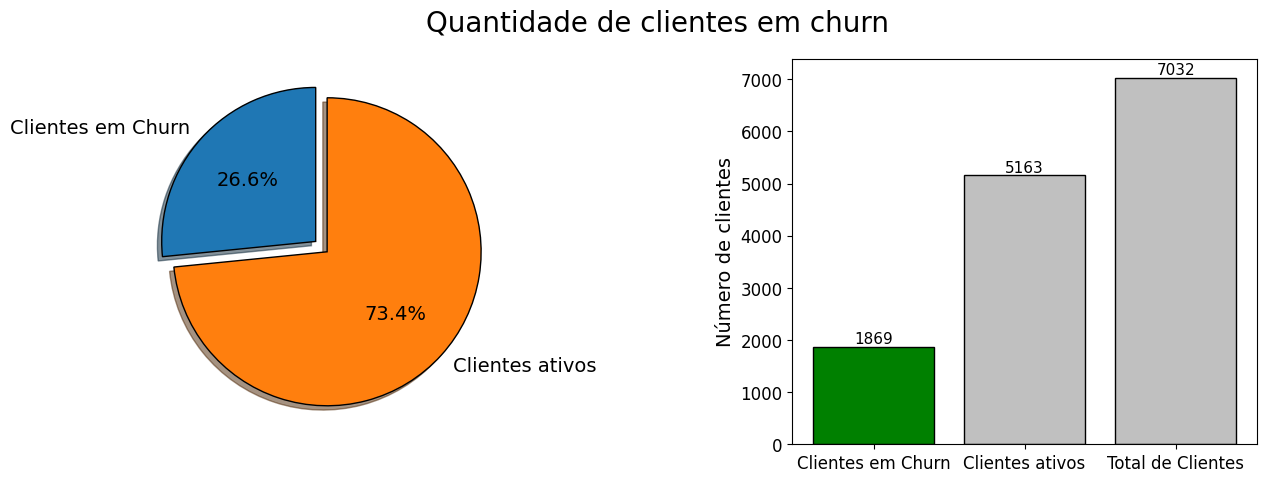

In [17]:
val = [param1, param1_1]
legenda = ['Clientes em Churn', 'Clientes ativos']
explo = [0.1,0]

fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.subplots_adjust( wspace = 0.5)
fig.suptitle('Quantidade de clientes em churn', fontsize = 20)

ax[0].pie(val, labels=legenda, autopct='%1.1f%%', startangle=90,explode=explo, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
cores = []
val_b = [1869, (p_lin-1869), p_lin]
leg_b = ['Clientes em Churn','Clientes ativos','Total de Clientes']
for i in leg_b:
  if i == 'Clientes em Churn':
    cores.append('g')
  else:
    cores.append('silver')
barra = ax[1].bar(leg_b, val_b, color = cores, edgecolor = 'black')
ax[1].set_ylabel('Número de clientes', fontsize = 14)
ax[1].set_xlabel('')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)

for b in barra:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=11)

fig.savefig('quantidade_churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()


In [18]:
param13

,count
gender,
Male,3675
Female,3592


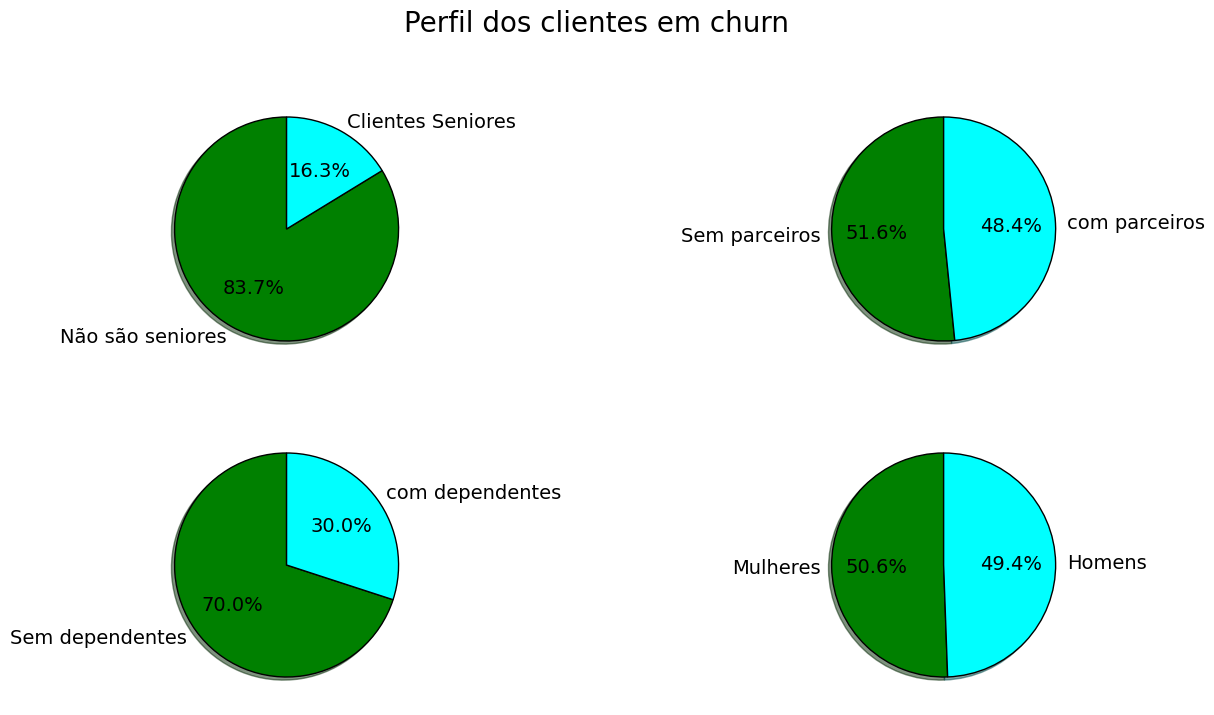

In [19]:
leg_1=['Não são seniores', 'Clientes Seniores']
val_1 = param2.tolist()

leg_2 = ['Sem parceiros', 'com parceiros']
val_2 = param3.tolist()

leg_3 = ['Sem dependentes', 'com dependentes']
val_3 = param4.tolist()

leg_4 = ('Mulheres', 'Homens')
val_4 = param13.tolist()

fig, ax = plt.subplots(2, 2, figsize = (15,8))
fig.subplots_adjust( wspace = 0.3)
fig.suptitle('Perfil dos clientes em churn', fontsize = 20)

ax[0,0].pie(val_1, labels=leg_1, autopct='%1.1f%%', startangle=90, shadow=True,\
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors=['green', 'cyan'])

ax[0,1].pie(val_2, labels=leg_2, autopct='%1.1f%%', startangle=90, shadow=True,\
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors=['green', 'cyan'])

ax[1,0].pie(val_3, labels=leg_3, autopct='%1.1f%%', startangle=90, shadow=True,\
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors=['green', 'cyan'])

ax[1,1].pie(val_4, labels=leg_4, autopct='%1.1f%%', startangle=90, shadow=True,\
            wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors=['green', 'cyan'])

fig.savefig('perdil_cliente_pizza.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()

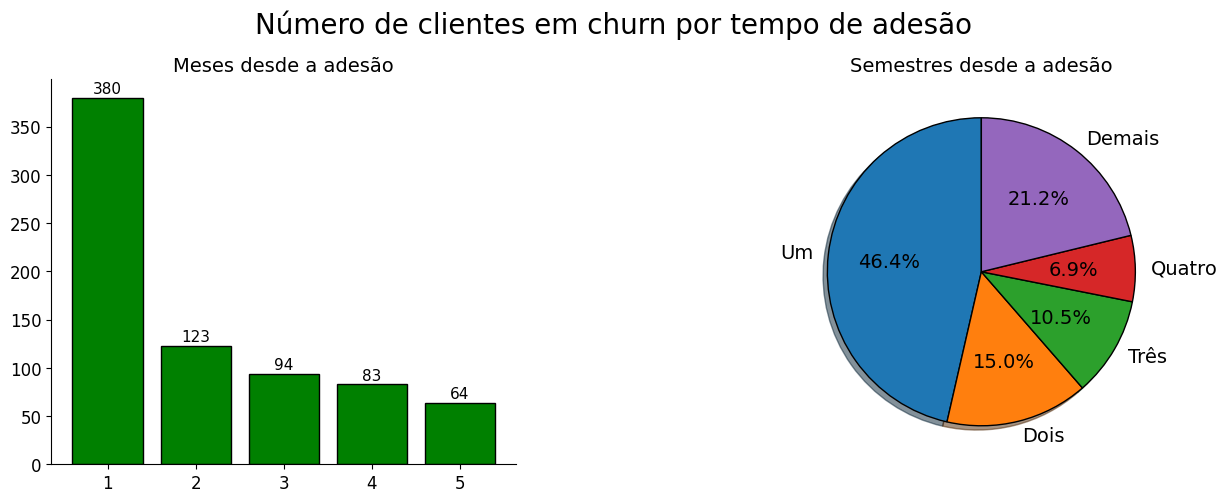

In [49]:
param5_h = param5.head()
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.subplots_adjust( wspace = 0.5)
fig.suptitle('Número de clientes em churn por tempo de adesão', fontsize = 20, y = 1.02)

barra_1 = ax[0].bar(param5_h.index, param5_h.values, color = 'green', edgecolor = 'black')
ax[0].set_title('Meses desde a adesão', fontsize = 14)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for b in barra_1:
  yval = b.get_height()
  ax[0].text(b.get_x() + b.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=11)

leg_p2=['Um', 'Dois', 'Três', 'Quatro', 'Demais']
val_p2=[param5_1, param5_2, param5_3, param5_4, param5_5]
cores_p = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",  "#9467bd"]

ax[1].pie(val_p2, labels=leg_p2, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors = cores_p)
ax[1].set_title('Semestres desde a adesão', fontsize = 14)

fig.savefig('tempo_adesão_churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()


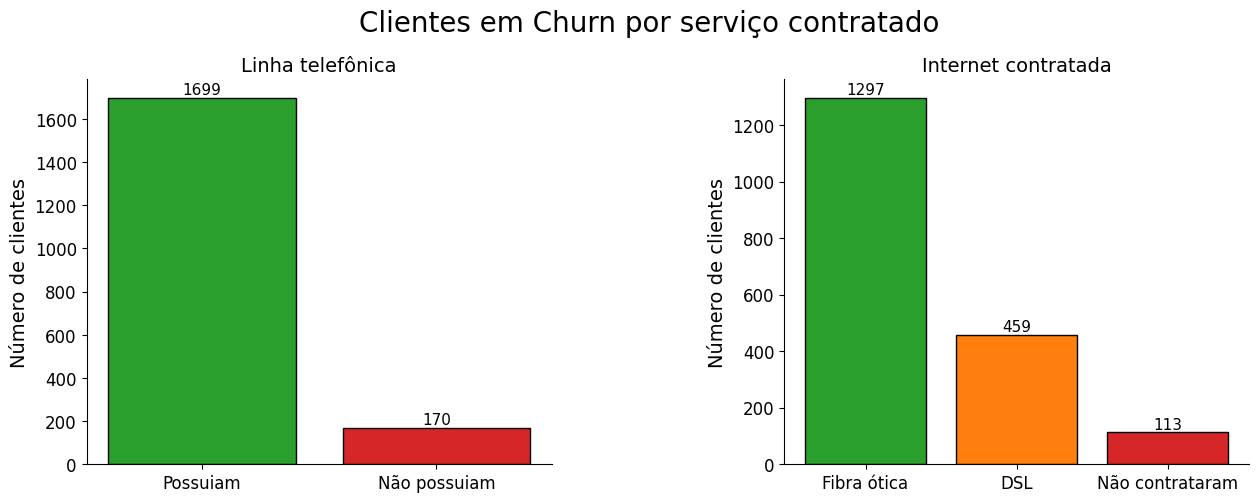

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.subplots_adjust( wspace = 0.5)
fig.suptitle('Clientes em Churn por serviço contratado', fontsize = 20, y = 1.02)

leg_b3=['Possuiam', 'Não possuiam']
val_b3=param6.values.tolist()
leg_b4=['Fibra ótica', 'DSL', 'Não contrataram']
val_b4=param7.values.tolist()
cores_b1 = ["#2ca02c" , "#d62728"]
cores_b2 = ["#2ca02c", "#ff7f0e", "#d62728"]


barra_2 = ax[0].bar(leg_b3, val_b3, color = cores_b1, edgecolor = 'black')
ax[0].set_title('Linha telefônica', fontsize = 14)
ax[0].set_ylabel('Número de clientes', fontsize = 14)
ax[0].set_xlabel('')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for b in barra_2:
  yval = b.get_height()
  ax[0].text(b.get_x() + b.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=11)

barra_3 = ax[1].bar(leg_b4, val_b4, color = cores_b2, edgecolor = 'black')
ax[1].set_title('Internet contratada', fontsize = 14)
ax[1].set_ylabel('Número de clientes', fontsize = 14)
ax[1].set_xlabel('')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
for b in barra_3:
  yval = b.get_height()
  ax[1].text(b.get_x() + b.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=11)


fig.savefig('serviço_contratado_churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()


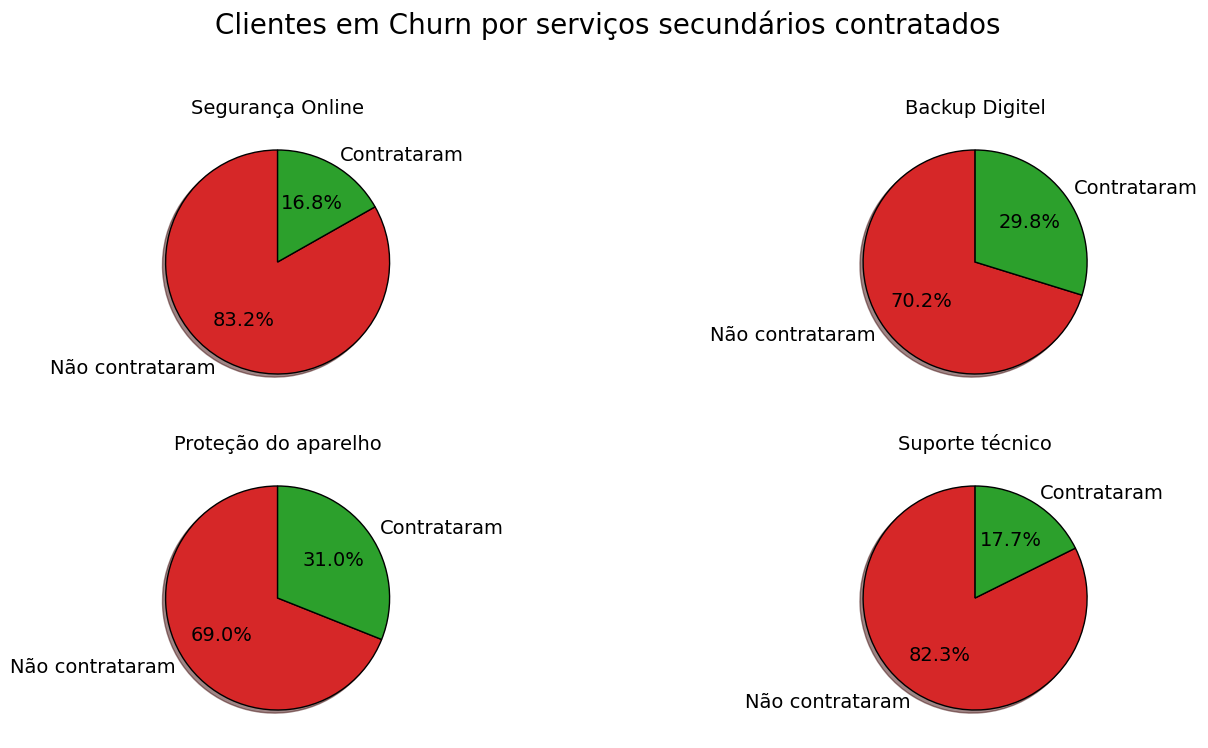

In [151]:
leg_ps = ('Não contrataram', 'Contrataram')
cores_b1 = ["#d62728" , "#2ca02c"]

fig, ax = plt.subplots(2, 2, figsize = (15,8))
fig.subplots_adjust( wspace = 0.5)
fig.suptitle('Clientes em Churn por serviços secundários contratados', fontsize = 20, y = 1.02)

ax[0,0].pie(param8.values, labels=leg_ps, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors = cores_b1)
ax[0,0].set_title('Segurança Online', fontsize = 14)

ax[0,1].pie(param9.values, labels=leg_ps, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors = cores_b1)
ax[0,1].set_title('Backup Digitel', fontsize = 14)

ax[1,0].pie(param10.values, labels=leg_ps, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors = cores_b1)
ax[1,0].set_title('Proteção do aparelho', fontsize = 14)

ax[1,1].pie(param11.values, labels=leg_ps, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14}, colors = cores_b1)
ax[1,1].set_title('Suporte técnico', fontsize = 14)

fig.savefig('serviço_contratado_sec__churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()


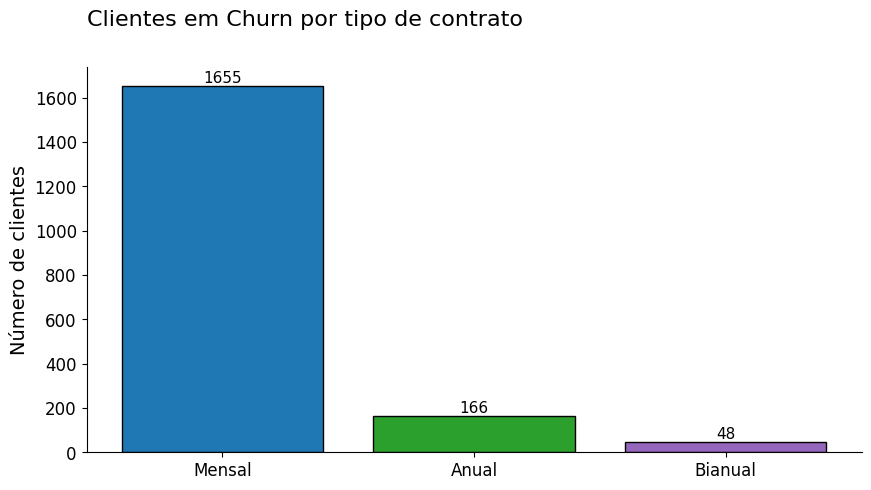

In [152]:
leg_bs = ('Mensal', 'Anual', 'Bianual')
cores_bc = ["#1f77b4", "#2ca02c",  "#9467bd"]

fig, ax = plt.subplots(figsize = (10,5))

barra_4 = ax.bar(leg_bs, param12.values, color = cores_bc, edgecolor = 'black')
ax.set_title('Clientes em Churn por tipo de contrato', fontsize = 16, loc = 'left', pad = 30)
ax.set_ylabel('Número de clientes', fontsize = 14)
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for b in barra_4:
  yval = b.get_height()
  ax.text(b.get_x() + b.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=11)

fig.savefig('contrato_churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()


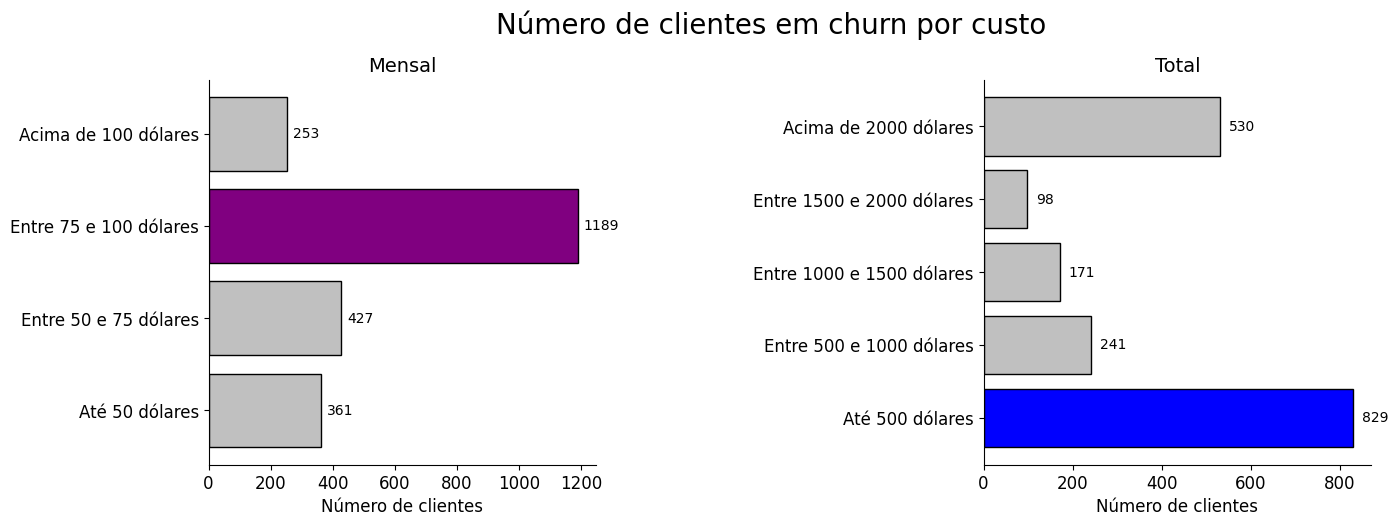

In [155]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.subplots_adjust( wspace = 1)
fig.suptitle('Número de clientes em churn por custo', fontsize = 20, y = 1.02)

val_b5 = [n_50,n_75,n_100,n_total]
leg_b5 = ['Até 50 dólares', 'Entre 50 e 75 dólares', 'Entre 75 e 100 dólares', 'Acima de 100 dólares' ]

val_b6 = [nt_500,nt_1000,nt_1500, nt_2000, nt_total]
leg_b6 = ['Até 500 dólares', 'Entre 500 e 1000 dólares', 'Entre 1000 e 1500 dólares', 'Entre 1500 e 2000 dólares', 'Acima de 2000 dólares' ]

color_bn=[]
for i in leg_b5:
  if i == 'Entre 75 e 100 dólares':
    color_bn.append('purple')
  else:
    color_bn.append('silver')

ax[0].barh(leg_b5, val_b5, color = color_bn, edgecolor = 'black')
ax[0].set_title('Mensal', fontsize = 14)
ax[0].set_xlabel('Número de clientes', fontsize = 12)
ax[0].set_ylabel('')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

color_bn=[]
for i in leg_b6:
  if i == 'Até 500 dólares':
    color_bn.append('blue')
  else:
    color_bn.append('silver')


for i, v in enumerate(val_b5):
  ax[0].text(v + 20, i, str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

ax[1].barh(leg_b6, val_b6, color = color_bn, edgecolor = 'black')
ax[1].set_title('Total', fontsize = 14)
ax[1].set_xlabel('Número de clientes', fontsize = 12)
ax[1].set_ylabel('')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
for i, v in enumerate(val_b6):
  ax[1].text(v + 20, i, str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

fig.savefig('gastos_churn.png', transparent = False, dpi = 300, bbox_inches = 'tight')
plt.show()

# **Relatório**

# Introdução
Nesse desafio fomos contratados como assistentes de ETL pela empresa TeleconX, uma empresa de telecomunicações que tem enfrentado um problema de Churn. Nosso objetivo é extrair, tratar e analisar os dados cedidos pela empresa para que com isso consigamos recomendar algumas ações para que o o indice de churm diminue.

#Análise exploratória de dados
Primeiro, foi importado as bibliotecas:


*   pandas como pd
*   matplotlib.plotpy como plt
*   numpy as np


Ao pegar os dados raw do git_hub, o link para eles foi guardado em uma variável que foi usada para trazer o banco de dados para o collab através da função pandas pd.read_json() e o Data Frame resultante foi guardado na variável df. Ao abrir o Data Frame, observou-se que existia 4 colunas aninhadas. Essas foram desaninhadas através do pd.json_normalize(df['Coluna aninhada']), isso teve que ser feito para cada uma das 4 colunas. Cada coluna normalizada foi guardada em uma variável, que foram usadas para fazer o Data Frame com os dados aninhados através do pd.concat(), nessa mesma função retiramos as colunas aninhadas do df, formando o Data Frame com todos os dados que foram disponibilizados, esse foi salvo na variável dff.\
A partir desse DataFrame, foi verificado que não existiam valores nulos com o .isnull().sum(). A seguir foi verificado os tipos de valores das colunas através do .info e os diferentes valores das colunas através de um laçofor i in df.columns.tolist() com print(df[i].unique()). Após isso as colunas object foram
Foi verificado que existiam valores vazios em churn para alguns clientes e outros clientes com valores de tenure igual a 0. Esses foram descartados por não trazerem nenhuma informação para o objetivo dessa análise. Foram detectados através de uma variável dele que continha os index dessas linhas, obtidas através de dff[dff['tenure'] == 0].index e depois deletadas com o dff.drop[dele, inplace = True]. Antes de fazer o mesmo com os valores vazios da coluna Churm, todos as colunas com dados do tipo object tiveram suas strings transformadas em letras minusculas através da função dfft.select_dtypes(include='object').apply(lambda x: x.str.lower()), depois foi feito o mesmo processo de deleção para os valores vazios da coluna Churm.\
Sem as linhas contendo os valores de tenure = 0, os dados numéricos das colunas Charges.Monthly e Charges.Total foram transformados de float64. E as outras colunas qualitativas com respostas binárias, ou binárias com uma exceção, foram transformadas em valores booleanos (com a exceção da coluna gender) através do algoritmo: lista = ['Churn','Partner','Dependents','PhoneService','MultipleLines','InternetService',\
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for i in lista:
    dfft[i] = dfft[i].map(lambda x: True if x == 'yes' else False if x == 'no' else x)
dfft['SeniorCitizen'] = dfft['SeniorCitizen'].map(lambda x: True if x == 1 else False if x == 0 else x)\
Os dados então foram salvos como DataFrame dfft. A partir daí foram criados mais dois dataframes com certas linhas excluidas através do processo já descrito: o dfft_ch que contém apenas os clientes em churn e o dfft_chi, que retirou os usuários que não contrataram a internet para analizar os serviços secundários.\
Então alguns parâmetros já descritos foram criados para a criação dos gráficos e análise dos dados.
Os gráficos foram criados a partir de funções do matplotlib.plotpy, e foram criados gráficos do tipo: barras, barras hotizontais e pizza.

# Conclusões e insights
No gráfico abaixo:
![Quantidade de clientes em Churn](quantidade_churn.png)
É possível verificar que 26,6% dos clientes estão em Churn. E no gráfico:
![Perfil do cliente em churn](perdil_cliente_pizza.png)
É possível verificar que os clientes mais jovens e sem parceiros são os que são os mais propensos a se tornarem Churn.
Outros dados dignos de nota são que os clientes em churn geralmente são clientes com pouco tempo de adesão aos serviços da empresa, como mostrado em:
![Número de clientes em churn por tempo de adesão](/content/tempo_adesão_churn.png)
Onde fica claro que a maior parte dos clientes em churn são os que tem uma adesão de até 6 meses, sendo que a desistência logo no primeiro mês contrinui significativamente para esse número.
Clientes em churn geralmente não contratam os serviços secundários de segurança, como mostrado em:
![Número de churm por serviço secundários](/content/serviço_contratado_sec__churn.png)
Possivelmente a falta de segurança ou suporte gratuito pode ser um fator que acaba espantando clientes novos.
Outro fator relevante é que a grande maioria de cliente em churm tem contratos mensais, como mostrado em:
![Número de Churm por tipo de contrato](/content/contrato_churn.png)
O que pode apontar uma preocupação por partes desses clientes de não se comprometer com a empresa antes de testar seus serviços.
E por último, foi notado que a grande maioria dos clientes em churn acabam gastando entre 75 e 100 dólares por mês com a TeleconX, tendo um gasto total menor que 500 dólares, o que corrobora a hipótese de que a maior taxa de Churn vem de clientes novos. Essas informações estão no gráfico:
![Quantidade de Churm por gastos](/content/gastos_churn.png)

#Recomendações
Oferecer serviços secundários gratuitos pelos primeiros 6 meses de adesão aos serviços pode ser o suficiente para que os novos clientes confiem conheçam a qualidade dos serviços da empresa e confiem nela o suficiente para se comprometerem a ficar a longo prazo. Gerar a possibilidade de contratos semestrais pode ser outra estratégia para fazer com que os clientes novos fiquem mais confortáveis a se comprometer a médio prazo com a TeleconX.

